# Machine learning for Classification problems
First of all let's start with some definitions and terminology.  
- What is machine learning?
- What are the types of machine learning problems?
- When to use machine learning?
- Logistic Regression for binary classification.
- Logistic Regression for multiclass classification.

## What is Machine learning
Machine learning is the use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyse and draw inferences from patterns in data.  
This essentially means that the inputs of a machine learning system are data and results, and the outputs are rules. unlike classical programming where the inputs are data and rules, and the outputs are results.

## Types of machine learning problems
- Supervised learning
    - Classification
    - Regression
    - ...
- Unsupervised learning
    - Clustering
    - ...
    
### Supervised learning
Supervised learning is a type of machine learning algorithms that is used when you have both the data and the target output and your goal is to learn the correlation between the data and the target output.  
One example is Classification which is going to be this notebook's example. You will be given 28 * 28 pixel data for a hand written digit from 0 to 9 and the goal is to know only from the pixel data what digit the data represents. So you should classify the data, hence the name.

### Unsupervised learning
Unsupervised learning algorithms are used when you don't have the target output for the training data. 
One example for clustering is when you have data of your ecommerce website users and you want to figure out how may sigments of users exists and what are there interests. In this case you're going to use the user features to cluster similar users together, however, notice that you don't know the number of clusters nor the names of the clusters.

## When to use machine learning
Machine learning should be use only if necessary, and you know that from the business problem itself. A common mistake is that some engineers try to enforce a machine learning solution to a problem that doesn't need it. Make sure you understand the business problem carefully and see if machine learning could solve it or not.  

This notebook, as you might guess, doesn't actually solve much of a business problem, however, it is a good practice for machine learning beginners, it is called "Hello world of machine learning".

In [1]:
# Before we dive into LogisticRegression, we need to take a look at the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("./train.csv")

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, there is a label column in the training dataframe which is the target output and you have pixel values from pixel0 all the way to pixel783 which is basically a flattened 28 * 28 image. each pixel has a value between 0 and 255, 0 being black and 255 being white.  
Let's take a look at some of these images

In [2]:
def show_training_example(df, train=True):
    index = np.random.randint(len(df))
    example = df.iloc[index]
    if train:
        label = example[0]
        img = example[1:].values.reshape((28, 28))
    else:
        img = example.values.reshape((28, 28))
        label = "Unknown"
    plt.imshow(img, cmap="gray")
    plt.title(label)
    plt.show()

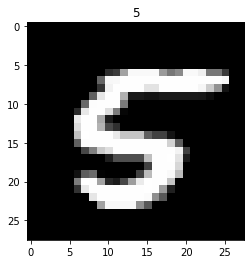

In [3]:
show_training_example(train_df)

The reason why the data is provided as a flattened array instead of an image is that almost all machine learning algorithms require a flat array (if we exclude deep learning).

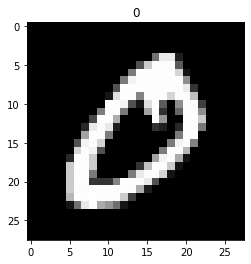

8816


In [4]:
# Now we are going to get images of only zeros and ones to do binar classification
binary_df = train_df.loc[train_df['label'] < 2]
show_training_example(binary_df)
print(len(binary_df))

## Logistic Regression

> **Note** some basic linear algebra ahead

Let's assume the input features make a vector $X$ where the dimension of $X$ is $(n, 1)$ where $n$ is the number of features.  
Right now we have only one output which takes values 0 or 1 let's call it the hypothesis $h$ of shape $(c, 1)$ where $c$ the number of classes (one in this case). we need some tranformation matrix that takes us from $X$ to $O$, we will call this matrix the weights matrix $W$ where $W$ is of shape $(n, c)$.  
Our hypothesis $h = X \odot W$ however there are two problems with this hypothesis:
- It always passes through the origin
- It outputs values from $-\infty$ to $\infty$ and we need numbers between 0 and 1

to solve the first problem we add the bias vector $b$ of shape $(1, 1)$ per example  
To solve the second we use the logistic sigmoid function which takes the real number line and squeezes it between 0 and 1.  
$$ h = \sigma(X \odot W + b) $$
Where
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

def hypothesis(X, W, b):
    return sigmoid(np.dot(X, W) + b)

What the hypothesis represents is the probability of the data example being of class 1, however, if we use it as is it will give random results simply because $W$ and $b$ are randomly initialized.  
We need a way to iteratively improve the values of $W$ and $b$ so that they would describe the data better.  
To do so we need to know how bad the current values are, and this is measured using the cost function.

We will write the loss function for one example and then we will write the general cost function and then explain both.
- Loss function
$$ l = - y\log(h(x)) - (1 - y)\log(1 - h(x)) $$
where $x$ is the feature vector for one example and $y$ is the target label.  

- Cost function over all examples
$$ L = \frac{1}{m}\sum_{i=1}^m - y_i\log(h(x_i)) - (1 - y_i)\log(1 - h(x_i)) $$
So the cost function is simply the mean of the loss over all training examples.  

Now let's see why this works.  
When $y_i == 1$ and $h(x_i) \simeq 0$ this means we got it wrong, this will cause the second term of the equation to equal 0 however the first term is goint to be $\log(~0)$ which is going to be a very big negative number.  
When $y_i == 1$ and $h(x_i) \simeq 1$ this means we got it right, this will cause the second term of the equation to equal 0 however the first term is goint to be $\log(~1)$ which is going to be a very small negative number.  

Now this proves that the Loss function we wrote earlier is a good indicator for how bad the model is which means we need to run some sort of optimization algorithm on this function to minimize it with respect to $W$ and $b$.

In [6]:
def cost(h, y):
    return (-y * np.log(h + 0.001) - (1 - y) * np.log(1 - h + 0.001)).mean()

## the small number in the log is to prevent log(0) which would overflow

### Gradient Descent
![Gradient Descent](https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)  

From vector analysis we know that the gradient of a function is the direction at which the function increases the most denoted by the symbol $\nabla$.  
If we can calculate the gradient of the cost function $\nabla L$ at any point and move in the opposite direction updating the weights and bias this is going to slowly decrease the loss until we reach a local minimum.  
Update equations
$$ W := W - \alpha * \nabla_{W} L $$
$$ b := b - \alpha * \nabla_{b} L $$
$ \nabla_{W} L = X^T \odot (h - y) $  
$ \nabla_{b} L = (h - y) $

In [7]:
# now let's start training
from sklearn.model_selection import train_test_split
X = binary_df.drop(columns=['label']).values / 255.
y = binary_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7052, 784)
(7052,)
(1764, 784)
(1764,)


In [8]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand(1)
alpha = 0.1
epochs = 200
costs = []
for i in range(epochs):
    h = hypothesis(X_train, W, b)
    costs.append(cost(h, y_train))
    W -= alpha * np.dot(X_train.T, (h - y_train))
    b -= alpha * (h - y_train).mean()
    if i % 10 == 0:
        print(costs[-1])
    

3.242745329045123
0.03916767861642684


<ipython-input-5-fc1c4a264ad5>:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-z))


0.028391118410526814
0.02251299466175317
0.02055362017263704
0.02055362007152382
0.017765025346654858
0.017771148380040794
0.01664420660258116
0.014765459250627272
0.013719841014672343
0.012989693882474375
0.01298911835767417
0.01202952597265271
0.011477398459352238
0.010926517033395478
0.00990943394959182
0.009357036107781875
0.00935566420870319
0.009370618126703001


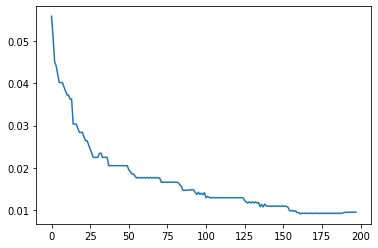

In [9]:
## Now let's see how the loss is decreasing
import matplotlib.pyplot as plt
plt.plot(list(range(198)), costs[2:])
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
h_test = hypothesis(X_test, W, b)
for i in range(h_test.size):
    h_test[i] = int(h_test[i] >= 0.5)

<ipython-input-5-fc1c4a264ad5>:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-z))


In [11]:
accuracy_score(y_test, h_test)

0.9982993197278912

As you can see we can now get a model that can classify images of hand written zeros and ones with an accuracy of 99.9% which is not bad at all.  
Now we will use [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="none")

model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9994331065759637

Outputs are very similar

### Multi class classification
If you read the docs for the LogisticRegression classifier, it will tell you that for multiclass classification (which means you have more than two classes) it can use the one-vs-Rest method (OvR) if you set the `multi_class` parameter to 'ovr', however, by default it uses crossentropy loss for multiclass problems which is more complex than the simple log loss function.  
OvR means that for the mnist problem it would train one classifier that can say whether a digit is 0 or not, and another for ones and another for twos and so on, so it would train 10 models, one for each digit.

In [13]:
X = train_df.drop(columns=["label"]).values / 255.
y = train_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Let's try it

## memory consuming code, don't run it
## or do, who cares

# model = LogisticRegression(penalty="none", multi_class="ovr")
# model.fit(scale(X_train), y_train)

# accuracy_score(y_test, model.predict(scale(X_test)))

In [15]:
# now let's try crossentropy
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

/home/mahmoud/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9176190476190477

just out of curiousity, what is the accuracy score on the training data

In [16]:
accuracy_score(y_train, model.predict(X_train))

0.9424107142857143

It seems to be much higher, this happened because the mode memorized the training data and failed to generalize to new data, this phenominon is called overfitting and can be solved using regularization
### Regularization
regularization is so simple, all we need to do is add a term to the loss function that penalizes the model for having high weights.
$$ L = \frac{1}{m}\sum_{i=1}^m - y_i\log(h(x_i)) - (1 - y_i)\log(1 - h(x_i)) + \lambda \|{W}\|^2 $$  
In scikit learn you just need to set the `penalty` parameter to 'l2' which is the default value.  
Let's try it.

In [17]:
model = LogisticRegression(penalty='l2', C=0.01)
model.fit(X_train, y_train)

train_score = accuracy_score(y_train, model.predict(X_train))
test_score = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy: {}, Testing Accuracy: {}".format(train_score, test_score))

Training Accuracy: 0.9172321428571428, Testing Accuracy: 0.9086904761904762


/home/mahmoud/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


If you look at the documentation you will see that the smaller the `C` parameter the stronger the regularization, which means it is the inverse of the $\lambda$ in the equation. try different values of `C` and see which results in the least overfitting

## Some cool plots
We are now going to build a dummy dataset of two features so we can see it and see the evolution of the decision boundary as it trains

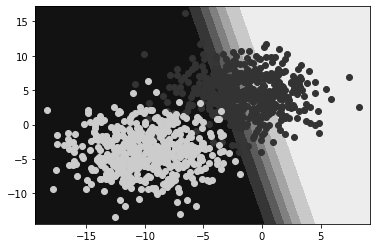

<ipython-input-5-fc1c4a264ad5>:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-z))


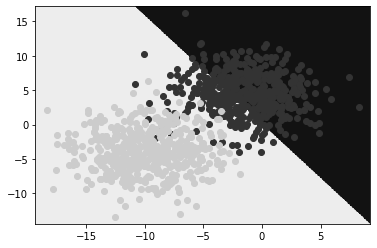

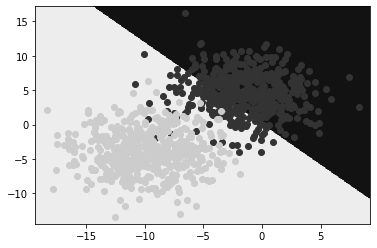

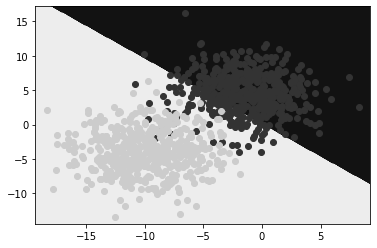

In [18]:
from sklearn.datasets import make_blobs
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

W = np.random.rand(X.shape[1])
b = np.random.rand(1)
alpha = 0.1
epochs = 4

colors = ["#333333", "#cccccc"]

for i in range(epochs):
    
    h = hypothesis(X, W, b)
    
    yhat = hypothesis(grid, W, b)
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap="gray")
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], c=colors[class_value])
    # show the plot
    plt.show()
    
    W -= alpha * np.dot(X.T, (h - y))
    b -= alpha * (h - y).mean()


If you look at the first plot you will notice that the decision boundary completely fails to describe the data, but soon after a couple of iterations it gets much better

# The End
I hope this was useful, thank you for coming this far and happy learning :D